# Pymaceuticals Inc.
---

### Analysis

- Mice treated with Capomulin have the lowest average tumor volume compared to mice treated with the other drug regimens. 
- There is a positive correlation between mouse weight (g) and average tumor volume (mm3). The correlation between mouse weight (g) and average tumor volume(mm3) is 0.84. 
- Based on the findings from the data, Capomulin is the most effectiev drug regimen for reducing tumor size in mice. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
merge_df["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# https://pandas.pydata.org/docs/reference/api/pandas.Series.duplicated.html#pandas.Series.duplicated
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates
duplicate_df = merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_df

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate2 = merge_df.loc[merge_df["Mouse ID"] == "g989"]
duplicate2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"].isin(duplicate_df)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

summary_df = pd.DataFrame({"Average Tumor Volume (mm3)": mean,
                           "Median Tumor Volume": median,
                           "Tumor Volume (mm3) Variance": var,
                           "Standard Deviation of Tumor Volume (mm3)": std,
                           "SEM of Tumor Volume (mm3)": sem})
summary_df                           

,Average Tumor Volume (mm3),Median Tumor Volume,Tumor Volume (mm3) Variance,Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
summary_df_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_df_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

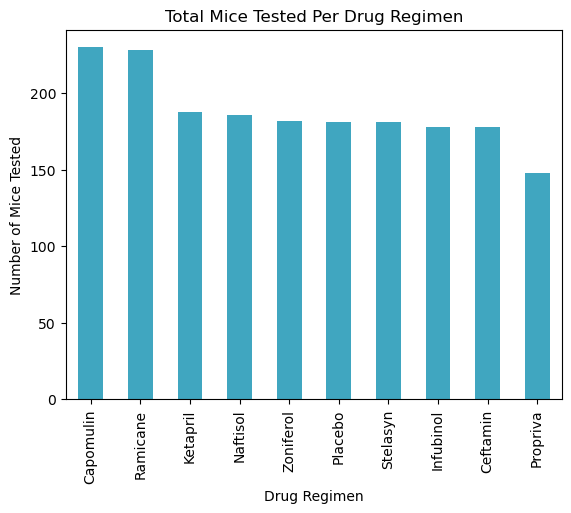

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# https://intellipaat.com/community/28865/add-x-and-y-labels-to-a-pandas-plot
mice = clean_df["Drug Regimen"].value_counts()
#mice
ax = mice.plot.bar(color = "#0089ab", alpha = .75)
ax.set(title= "Total Mice Tested Per Drug Regimen", xlabel = "Drug Regimen", ylabel= "Number of Mice Tested")
ax ;

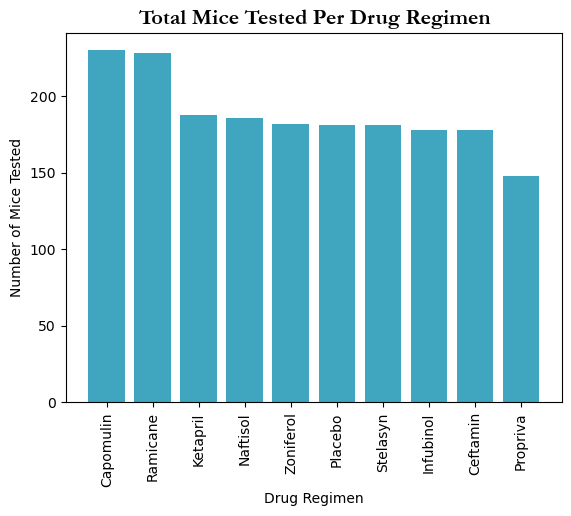

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# https://www.geeksforgeeks.org/python-pandas-series-tolist/
mice2 = clean_df["Drug Regimen"].value_counts()
#mice2
x_axis = np.arange(len(mice))

plt.bar(mice2.index.values, mice2.values, color = "#0089ab", alpha = .75)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Total Mice Tested Per Drug Regimen",fontweight="bold", font= "Garamond", fontsize = 16 )
plt.show()

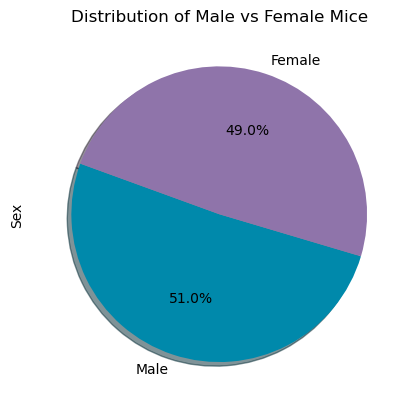

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df["Sex"].value_counts()
#sex
colors = ["#0089ab", "#8f74aa"]
ax2 = sex.plot.pie(autopct = "%1.1f%%", shadow=True, colors= colors, startangle=160, title = "Distribution of Male vs Female Mice")

''

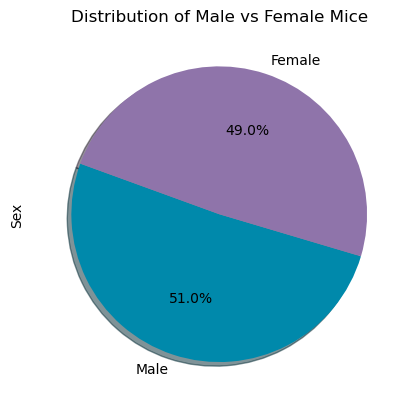

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
dist = ["Male", "Female"]
fig, ax = plt.subplots()
plt.pie(sex, labels= dist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
ax.set_title("Distribution of Male vs Female Mice")
plt.ylabel ("Sex")
;

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
cef = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
#cap.head()
# Start by getting the last (greatest) timepoint for each mouse
cap_last = cap.groupby(clean_df["Mouse ID"]).max() ["Timepoint"]
cap_last
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_merge_df = pd.merge(cap_last ,clean_df, on=("Mouse ID", "Timepoint"), how="left")
cap_merge_df.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [16]:
# Capomulin IQR Data 
# Calculate the IQR and quantitatively determine if there are any potential outliers
cap_treat = cap_merge_df["Tumor Volume (mm3)"]

quartiles = cap_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume treated with Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume treated with Capomulin is: {upperq}")
print(f"The interquartile range of tumor volume treated with Capomulin is: {iqr}")
print(f"The the median of tumor volume treated with Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume treated with Capomulin is: 32.37735684
The upper quartile of tumor volume treated with Capomulin is: 40.1592203
The interquartile range of tumor volume treated with Capomulin is: 7.781863460000004
The the median of tumor volume treated with Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [17]:
# Ramicane IQR Data 
ram_last = ram.groupby(clean_df["Mouse ID"]).max() ["Timepoint"]
ram_last

ram_merge_df = pd.merge(ram_last ,clean_df, on=("Mouse ID", "Timepoint"), how="left")
ram_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [18]:
# Ramicane IQR Data Continued 
# Calculate the IQR and quantitatively determine if there are any potential outliers
ram_treat = ram_merge_df["Tumor Volume (mm3)"]

quartiles = ram_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume treated with Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume treated with Ramicane is: {upperq}")
print(f"The interquartile range of tumor volume treated with Ramicane is: {iqr}")
print(f"The the median of tumor volume treated with Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume treated with Ramicane is: 31.56046955
The upper quartile of tumor volume treated with Ramicane is: 40.65900627
The interquartile range of tumor volume treated with Ramicane is: 9.098536719999998
The the median of tumor volume treated with Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [19]:
# Infubinol IQR Data 
inf_last = inf.groupby(clean_df["Mouse ID"]).max() ["Timepoint"]
inf_last

inf_merge_df = pd.merge(inf_last ,clean_df, on=("Mouse ID", "Timepoint"), how="left")
inf_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [20]:
# Infubinol IQR Data Continued 
# Calculate the IQR and quantitatively determine if there are any potential outliers
inf_treat = inf_merge_df["Tumor Volume (mm3)"]

quartiles = inf_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume treated with Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume treated with Infubinol is: {upperq}")
print(f"The interquartile range of tumor volume treated with Infubinol is: {iqr}")
print(f"The the median of tumor volume treated with Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume treated with Infubinol is: 54.04860769
The upper quartile of tumor volume treated with Infubinol is: 65.52574285
The interquartile range of tumor volume treated with Infubinol is: 11.477135160000003
The the median of tumor volume treated with Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [21]:
# Ceftamin IQR Data 
cef_last = cef.groupby(clean_df["Mouse ID"]).max() ["Timepoint"]
cef_last

cef_merge_df = pd.merge(cef_last ,clean_df, on=("Mouse ID", "Timepoint"), how="left")
cef_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [22]:
# Ceftamine IQR Data Continued 
# Calculate the IQR and quantitatively determine if there are any potential outliers

cef_treat = cef_merge_df["Tumor Volume (mm3)"]

quartiles = cef_treat.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume treated with Ceftamine is: {lowerq}")
print(f"The upper quartile of tumor volume treated with Ceftamine is: {upperq}")
print(f"The interquartile range of tumor volume treated with Ceftamine is: {iqr}")
print(f"The the median of tumor volume treated with Ceftamine is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor volume treated with Ceftamine is: 48.72207785
The upper quartile of tumor volume treated with Ceftamine is: 64.29983003
The interquartile range of tumor volume treated with Ceftamine is: 15.577752179999997
The the median of tumor volume treated with Ceftamine is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


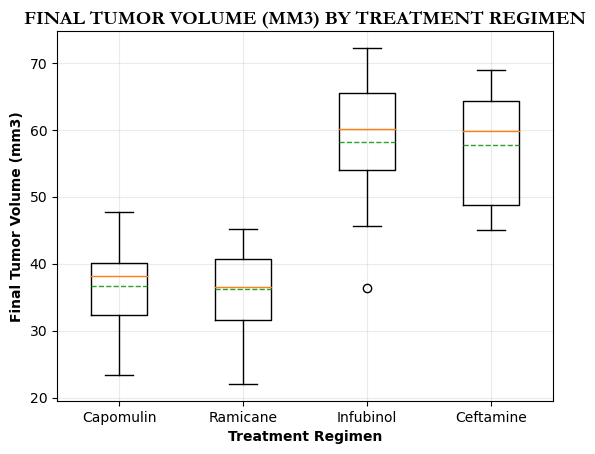

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_list = [cap_treat, ram_treat, inf_treat, cef_treat]
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamine"]

fig1, ax1 = plt.subplots()
ax1.set_title("FINAL TUMOR VOLUME (MM3) BY TREATMENT REGIMEN", font= "Garamond", fontsize = 14, fontweight = "bold")
ax1.set_ylabel("Final Tumor Volume (mm3)", fontweight="bold")
ax1.set_xlabel("Treatment Regimen", fontweight="bold")
ax1.boxplot(tumor_list,labels=treatment, showmeans= True, meanline = True)
plt.grid(alpha=.25)

plt.show()

## Line and Scatter Plots

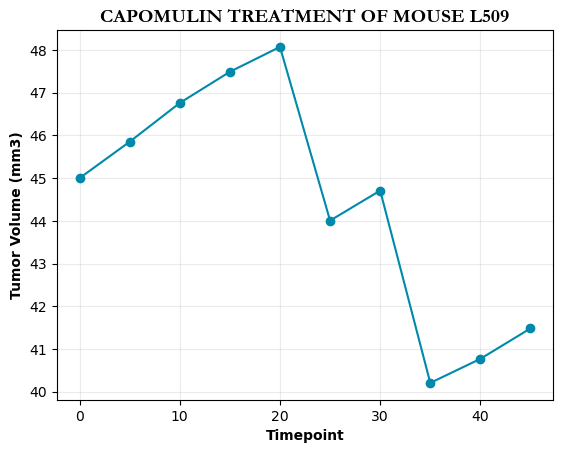

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cap.loc[cap["Mouse ID"] == "l509",:]
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis, color = "#0089ab", marker = "o")
plt.title("CAPOMULIN TREATMENT OF MOUSE L509", fontweight="bold", font= "Garamond", fontsize = 14)
plt.xlabel("Timepoint", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontweight="bold")
plt.grid(alpha=.25)

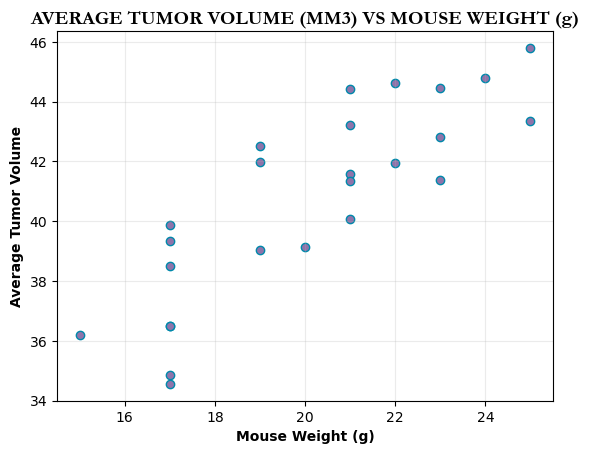

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = cap.groupby(["Mouse ID"]).mean()
#cap_avg

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"], color="#8f74aa", edgecolors="#0089ab")
plt.title("AVERAGE TUMOR VOLUME (MM3) VS MOUSE WEIGHT (g)",fontweight="bold", font= "Garamond", fontsize = 14)
plt.xlabel("Mouse Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume", fontweight="bold")
plt.grid(alpha=.25)

## Correlation and Regression

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

cap_corr = round(st.pearsonr(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between Mouse Weight (g) and Average Tumor Volume (mm3) is {cap_corr}")

The correlation between Mouse Weight (g) and Average Tumor Volume (mm3) is 0.84


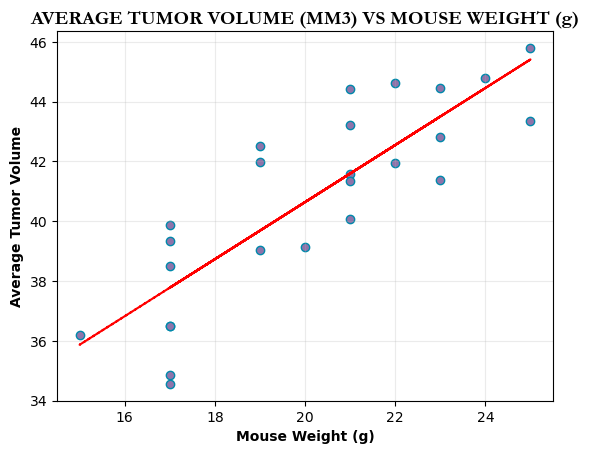

In [51]:
# vehicles.ipynb
x = cap_avg["Weight (g)"]
y = cap_avg["Tumor Volume (mm3)"]

slope, intercept, r, p, std_err = st.linregress(x, y)
cap_fit = x * slope + intercept

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"], color="#8f74aa", edgecolors="#0089ab")
plt.plot(x, cap_fit ,"r--")
plt.title("AVERAGE TUMOR VOLUME (MM3) VS MOUSE WEIGHT (g)",fontweight="bold", font= "Garamond", fontsize = 14)
plt.xlabel("Mouse Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume", fontweight="bold")
plt.grid(alpha=.25)